In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("ToyotaCorolla - MLR.csv") 

In [4]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
df.shape

(1436, 11)

In [10]:
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [7]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [32]:
df.duplicated().sum()

1

In [14]:
print(df['Fuel_Type'].unique())
print(df['Automatic'].unique())

['Diesel' 'Petrol' 'CNG']
[0 1]


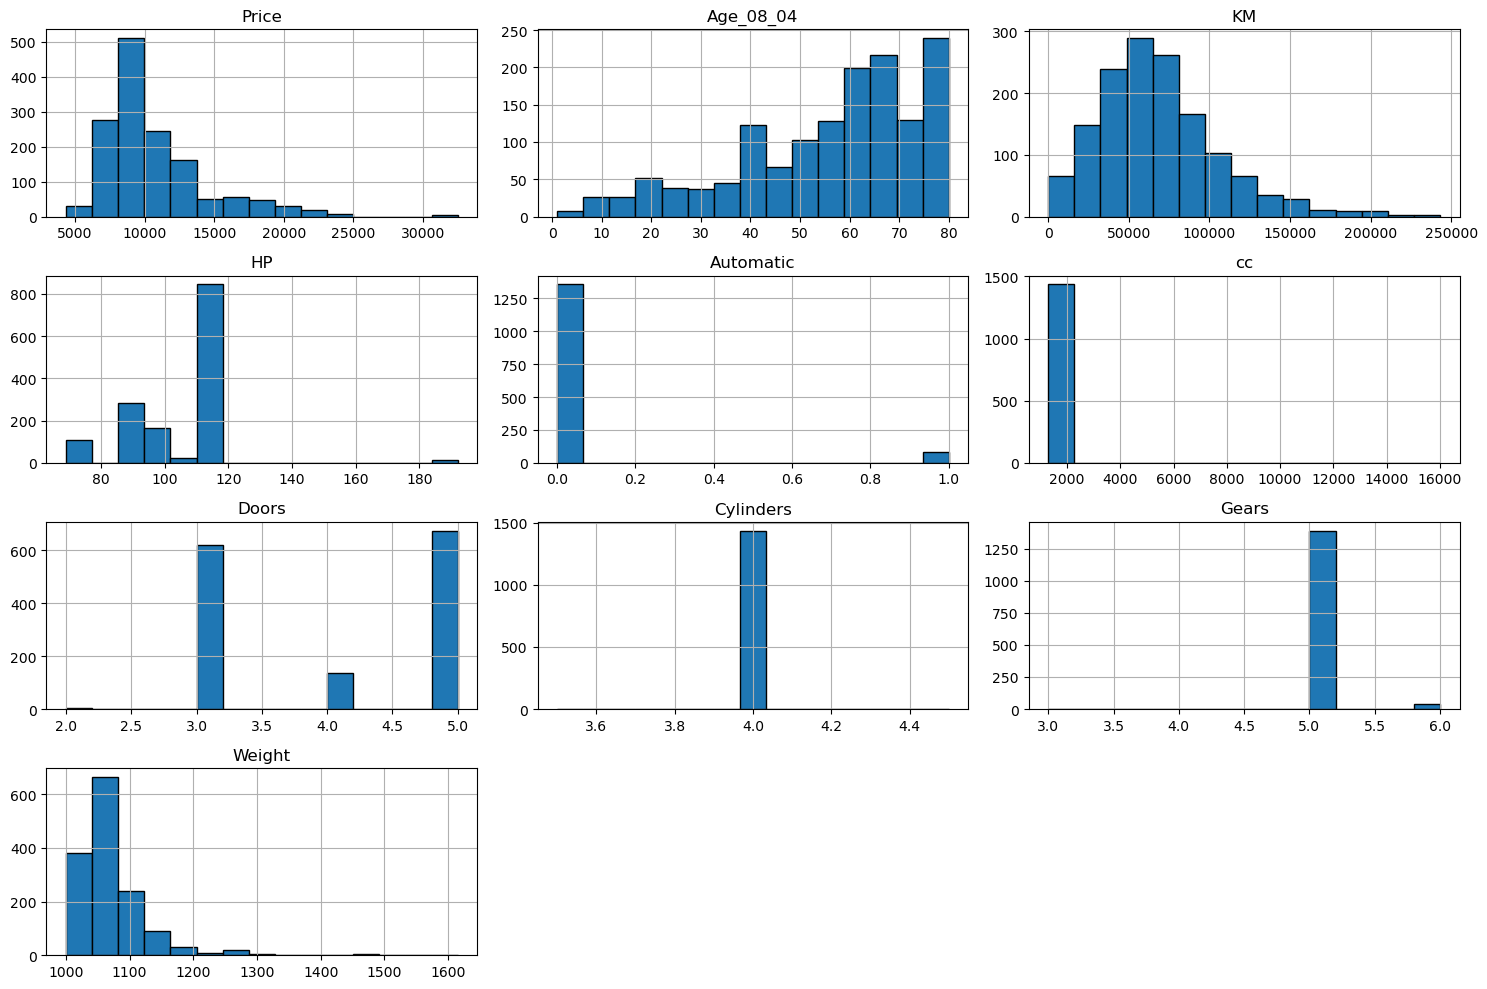

In [15]:
df.hist(bins=15, figsize=(15, 10), edgecolor="black")
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17340\2896179213.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


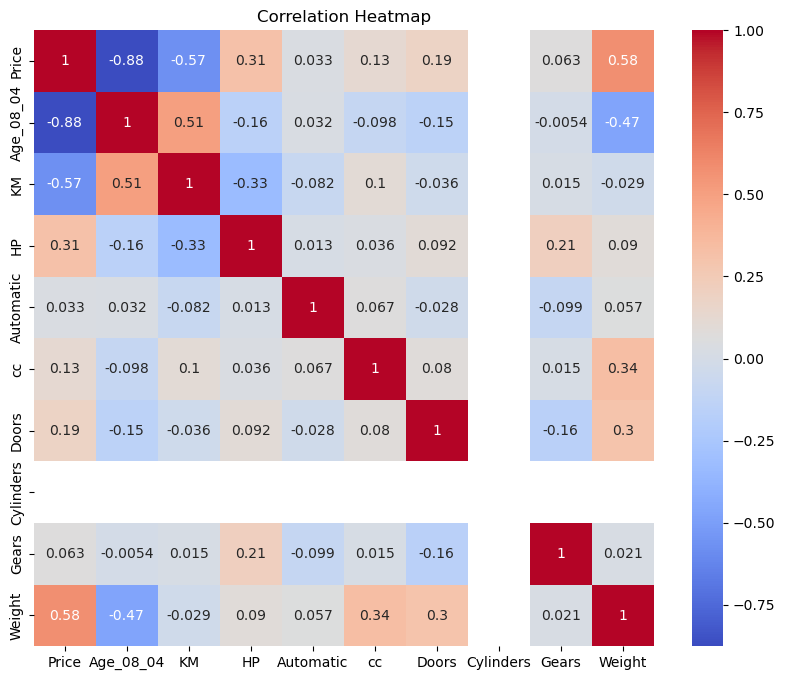

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

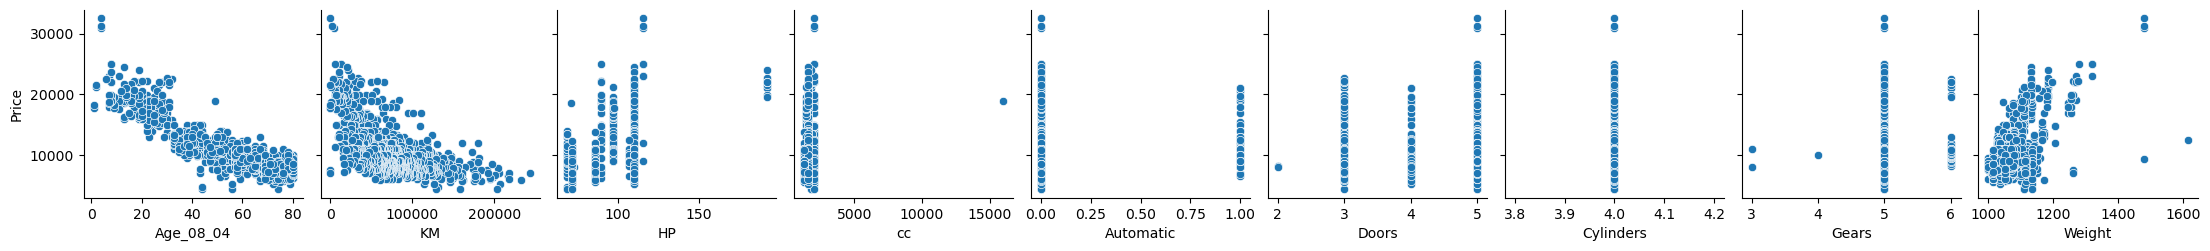

In [18]:
sns.pairplot(df, x_vars=['Age_08_04', 'KM', 'HP', 'cc', 'Automatic','Doors','Cylinders','Gears','Weight'], y_vars='Price', kind='scatter')
plt.show()

In [20]:
df=pd.get_dummies(df,columns=['Fuel_Type'],drop_first=True)

In [21]:
df['Automatic']=df['Automatic'].apply(lambda x:1 if x=='Yes'else 0)

In [22]:
df.fillna(df.median(),inplace=True)

In [23]:
scaler=StandardScaler()
num_vars=['Age_08_04','KM','HP','cc','Automatic','Doors','Cylinders','Gears','Weight']
df[num_vars]=scaler.fit_transform(df[num_vars])

In [30]:
features=df.drop(columns='Price')
features.head()                

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.771966,-0.574695,-0.768042,0.0,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
1,-1.771966,0.117454,-0.768042,0.0,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
2,-1.718184,-0.715386,-0.768042,0.0,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
3,-1.610620,-0.547650,-0.768042,0.0,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
4,-1.395491,-0.801028,-0.768042,0.0,0.997419,-1.085139,0.0,-0.140425,1.853577,1,0


In [33]:
target=df[['Price']]
target.head()

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


In [34]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.80,random_state=100)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1148, 11)
(1148, 1)
(288, 11)
(288, 1)


In [38]:
lin_model=LinearRegression()

In [39]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred=lin_model.predict(x_test)

In [48]:
y_predict=lin_model.predict(x_train)
y_predict

array([[ 8630.32964812],
       [10541.89640975],
       [ 8947.76301166],
       ...,
       [13240.74363089],
       [15588.28213739],
       [ 9397.51667207]])

In [49]:
y_predict1=lin_model.predict(x_test)
y_predict1

array([[15691.35066342],
       [ 9899.74446915],
       [13186.60248414],
       [10162.7706518 ],
       [ 8202.33615034],
       [ 9283.94496498],
       [13256.44399652],
       [ 5252.56008875],
       [13513.00093695],
       [ 8102.06797965],
       [14104.73037031],
       [ 8786.14627267],
       [11938.92777813],
       [ 7082.42686838],
       [17529.1255871 ],
       [ 8409.0377803 ],
       [14064.36581836],
       [15779.77731143],
       [16814.78831619],
       [ 9472.03531579],
       [11644.87033189],
       [ 8546.54104154],
       [11329.99626851],
       [10521.02980968],
       [ 8194.58639013],
       [ 9653.98704532],
       [ 8069.19533859],
       [ 9059.69830712],
       [10806.17643228],
       [ 7469.72994134],
       [ 8354.63115948],
       [14086.7464497 ],
       [ 8515.40226126],
       [18457.38459235],
       [10419.79009351],
       [ 9023.67037826],
       [ 6157.68319912],
       [ 7737.29650736],
       [11454.75770106],
       [11227.2954325 ],


In [50]:
r2_score(y_train,y_predict)

0.8680803932000749

In [51]:
r2_score(y_test,y_predict1)

0.8442587894581389

<Axes: xlabel='Price'>

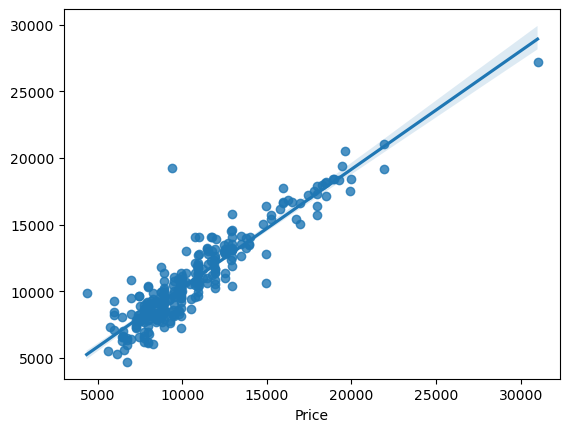

In [52]:
sns.regplot(data=df,x=y_test,y=y_pred)

<Axes: xlabel='Price'>

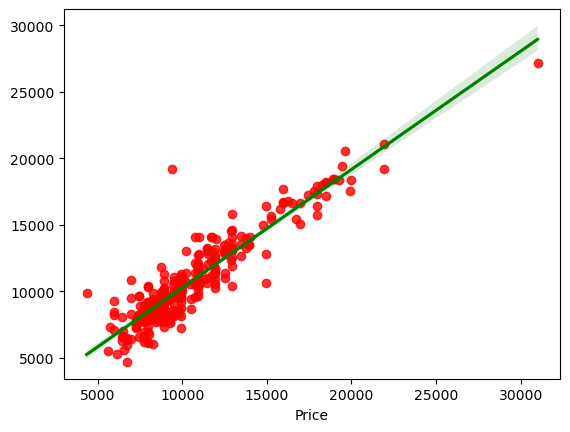

In [53]:
sns.regplot(data=df,x=y_test,y=y_pred,scatter_kws={'color':'red'},line_kws={'color':'green'})

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [55]:
mean_absolute_error(y_test,y_pred).round(2)

957.54

In [56]:
mean_squared_error(y_test,y_pred).round(2)

1853807.47

In [57]:
(mean_absolute_percentage_error(y_test,y_pred)*100).round(2)

10.02

In [58]:
features.shape

(1436, 11)

In [59]:
N=1436
k=11

In [60]:
adj_r2=1-(((1-R_squared)*(N-1)/(N-k-1)))
adj_r2

0.843055732354234

In [61]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)  
lasso.fit(x_train,y_train)
print("Lasso Coefficients:", lasso.coef_)

Lasso Coefficients: [-2241.50601355  -677.23296261   331.30244548     0.
   -15.6749542    -39.72179299     0.           109.50999057
  1230.73817586   740.72685427  1671.73563007]


In [63]:
y_pred_lasso = lasso.predict(x_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso - RMSE: {rmse_lasso}, R2: {r2_lasso}")

Lasso - RMSE: 1361.1784634622459, R2: 0.844342856900986


#### Interview Questions:



1.What is Normalization & Standardization and how is it helpful?


Normalization and standardization are techniques used in Multiple Linear Regression (MLR) to scale numerical features, improving model performance and interpretability. Normalization rescales data to a fixed range, typically [0,1] or [-1,1], making it useful when features have different units or scales. Standardization transforms data to have a mean of 0 and a standard deviation of 1, preserving the distribution shape while centering and scaling it. In MLR, these techniques help by preventing variables with larger magnitudes from disproportionately influencing the model, improving numerical stability, reducing multicollinearity, and enhancing convergence in optimization algorithms, particularly for gradient-based methods like Ordinary Least Squares (OLS) or Ridge Regression.

2.What techniques can be used to address multicollinearity in multiple linear regression?


In Multiple Linear Regression (MLR), multicollinearity occurs when predictor variables are highly correlated, leading to unreliable coefficient estimates and inflated standard errors. To address this issue, several techniques can be used. Variance Inflation Factor (VIF) can help detect multicollinearity by identifying variables with high VIF values, which may need removal or transformation. Feature selection techniques, such as stepwise regression or principal component analysis (PCA), can reduce redundancy by selecting independent predictors. Regularization methods, like Ridge Regression (L2 penalty) and Lasso Regression (L1 penalty), help mitigate multicollinearity by constraining or shrinking coefficients, stabilizing the model. Additionally, combining correlated variables through averaging or domain-specific transformation can reduce redundancy while retaining meaningful information. These techniques improve the robustness and interpretability of the MLR model, ensuring more reliable predictions.